---
layout: post
title: "Loss function이란 무엇일까?"
author: "Chanjun Kim"
categories: Data분석
tags: [Data, Lossfunction, 손실함수, 목적함수, 비용함수, 머신러닝, 딥러닝, ML, DeepLearning]
image: 06_LSTM.png
---

## **학습목적**
이 포스팅에선 머신러닝/딥러닝에 쓰이는 Loss function에 대해서 알아보겠습니다.<br>

#### **1. Objective / Cost / Loss function**
- 만들고자 하는 머신러닝/딥러닝 모델을 만들 때 대체로 Loss function이란 말을 쓰지만 조금의 차이가 있을 수 있으니 위 세개의 말이 어떻게 다른지 알아보겠습니다.

**1. Objective Function(목적 함수)**
- 목적함수는 셋 중에 가장 큰 범위로 말 그대로 모델을 만드는 목적을 말합니다. 보통 Loss function은 오차를 최소화하기 위한 것이지만 MLE 같이 최대화하는 경우는 Loss function에는 포함되지 않습니다.

**2. Loss Function(손실 함수)**
- 손실 함수는 우리가 가지고 있는 예측된 값과 실제 Y값의 차이를 계산하는 함수입니다.

**3. Cost Function(목적 함수)**
- 목적함수는 전체 데이터의 손실의 합을 의미합니다.

### **모델 종류에 따른 Cost function의 종류**
- 분류 모델인지 회귀 모델인지에 따라서 각각 다른 Cost/Loss function을 사용하고 그 안에서도 다양하게 분류되어있습니다.
    - 이 중에서 대표적인 함수 몇개에 대해서 알아보도록 하겠습니다.

![Oops](https://miro.medium.com/max/972/1*3MsFzl7zRZE3TihIC9JmaQ.png)

- *사실 Loss function과 Cost function이 혼용되어 사용되고 있는 것 같습니다.*
    
> 출처 : [https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

---

#### 1. MSE - Mean Squared Error(평균 제곱 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FraTNF%2FbtqILMEZ4dR%2FGVFcXNBaX3KXuGWJ2MHsTk%2Fimg.png)

- 실제값과 예측값 오차(Error)의 제곱값의 평균입니다. 
    - 즉 오차의 제곱이 Loss function, 그 평균이 Cost function이 됩니다.(이 설명은 아래서부터는 생략하겠습니다.)
    - Gradient Descent를 할 때 미분값이 활용되므로 가장 일반적인 비용함수로 활용된다고 합니다.
    - 사용되지만 Error에 제곱을 하기 때문에 이상치에 민감하게 되는 특성을 가지고 있습니다.
    
---
    


#### 2. MAE - Mean Absolute Error(평균 절대 오차)

![Oops](https://blog.kakaocdn.net/dn/p0MT3/btqIPQ7GhmP/yk484qPJ3MK90RG9gnFOR1/img.png)

- 실제값과 예측값 오차(Error)의 절대값의 평균입니다.
    - 실제 값에 절대값만 취했기 때문에 오차에 민감하지 않습니다.
    - 미분을 하면 항상 일정하기 때문에 수렴이 안될 수도 있습니다.

##### ※ MAE와 MSE 의 손실 그래프
![Oops](https://miro.medium.com/max/700/1*JTC4ReFwSeAt3kvTLq1YoA.png)

- 첫번째 MAE의 손실함수는 오차가 작아지더라도 똑같은 기울기를 갖기 때문에 수렴하지 못할 가능성이 있습니다.

> 출처 : https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

In [2]:
import os
import sys
import warnings

import random

import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

from plotnine import * 

In [3]:
%matplotlib inline
warnings.filterwarnings(action='ignore')

---

#### **Sample Data : 700, noise : 3**

- sklearn의 make_regression을 노이즈가 크고 작은 regression 데이터를 만든 후 GradientBoostRegression 에서 loss를 lad(Least Absolute Deviations), ls(Least Square) 를 각각의 Cost function으로 사용하여 비교를 해보겠습니다.

In [123]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

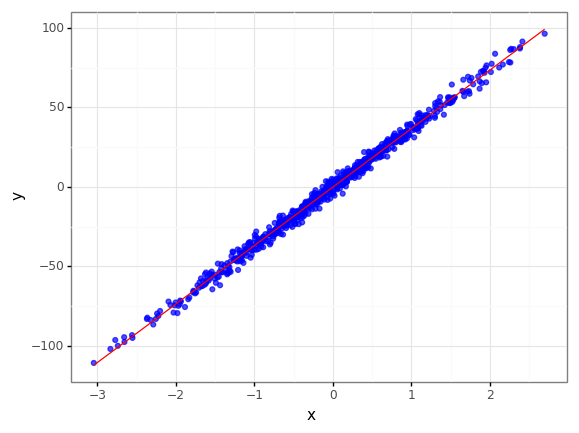

<ggplot: (155675868729)>

In [124]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

In [125]:
train_noise3, val_noise3 = train_test_split(reg_data)

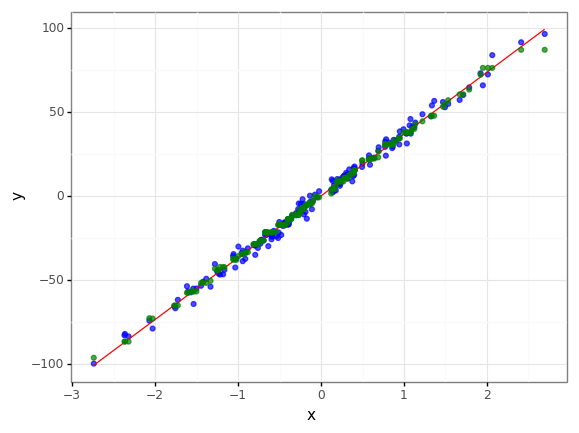

<ggplot: (-9223371881178986054)>

In [126]:
gb_mae = GradientBoostingRegressor(loss='lad')
gb_mae.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mae"] = gb_mae.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

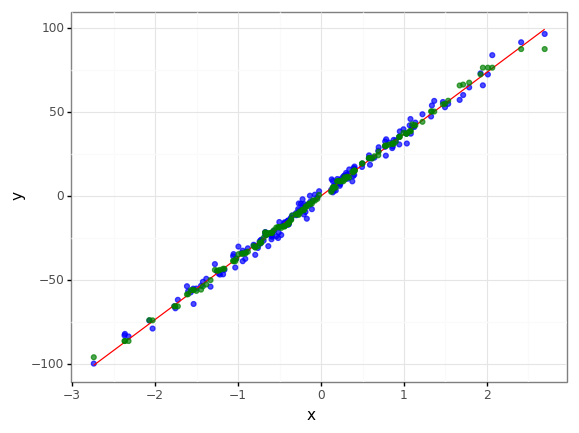

<ggplot: (155674413590)>

In [127]:
gb_mse = GradientBoostingRegressor(loss='ls')
gb_mse.fit(train_noise3[["x"]], train_noise3["y"])
val_noise3["predict_mse"] = gb_mse.predict(val_noise3[["x"]])

(
    ggplot() +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise3.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise3, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

In [128]:
r2_mse = r2_score(val_noise3["y"], val_noise3["predict_mse"])
r2_mae = r2_score(val_noise3["y"], val_noise3["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.9923091690869883 
loss function = mae , r2 = 0.9921677374887907 

mse loss function is better


- 거의 차이가 나지 않으나 mse가 근소하게 더 좋게 나타났습니다.
    - 사실 데이터가 너무 좋으면 Cost function이 무슨 의미가....

---

#### **Sample Data : 700, noise : 30 -> 노이즈 량을 추가** 

In [10]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=30, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

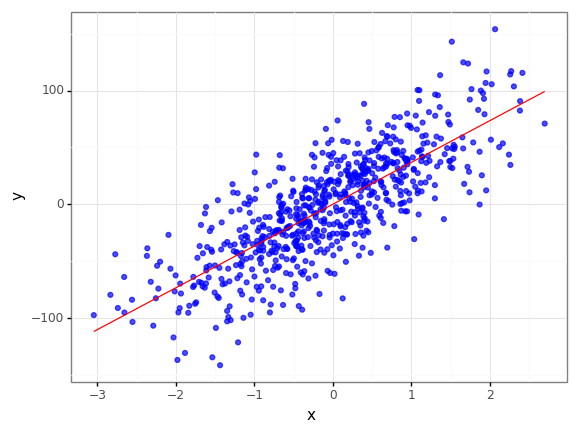

<ggplot: (-9223371881180486200)>

In [11]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

In [12]:
train_noise30, val_noise30 = train_test_split(reg_data)

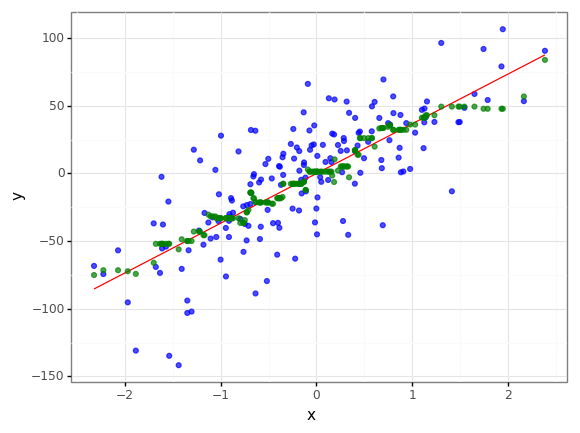

<ggplot: (-9223371881180335728)>

In [13]:
mod_mae = GradientBoostingRegressor(loss='lad')
mod_mae.fit(train_noise30[["x"]], train_noise30["y"])
val_noise30["predict_mae"] = mod_mae.predict(val_noise30[["x"]])

(
    ggplot() +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise30.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

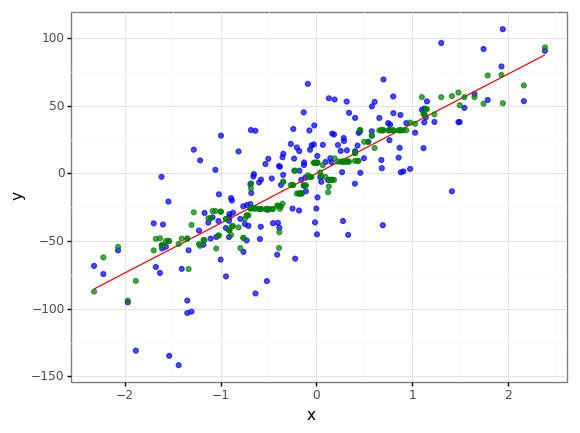

<ggplot: (-9223371881179257137)>

In [14]:
mod_mse = GradientBoostingRegressor(loss='ls')
mod_mse.fit(train_noise30[["x"]], train_noise30["y"])
val_noise30["predict_mse"] = mod_mse.predict(val_noise30[["x"]])

(
    ggplot() +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise30.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise30, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

In [15]:
r2_mse = r2_score(val_noise30["y"], val_noise30["predict_mse"])
r2_mae = r2_score(val_noise30["y"], val_noise30["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.5547276072137236 
loss function = mae , r2 = 0.5880732721218512 

mae loss function is better


- 두개의 성능이 둘다 확연히 떨어졌지만, mae를 비용함수로 사용하는게 평가지표(R2)에서 더 좋다는 것을 확인할 수 있습니다.
    - 하지만 그래프를 보고 두개의 특징을 표현하기에는 애매해 보입니다.

---

#### **Sample Data : 700, noise : 3 -> 랜덤 노이즈 추가**

In [16]:
reg_data = make_regression(n_samples=700, n_features=1, coef = True, bias=0, noise=3, random_state=0)
W = reg_data[2]
reg_data = pd.DataFrame({"x" : np.reshape(reg_data[0], (1, -1))[0], "y" : np.reshape(reg_data[1], (1, -1))[0]})

In [17]:
reg_data.y.describe()

count    700.000000
mean      -2.452193
std       37.111026
min     -110.632613
25%      -26.714069
50%       -2.736849
75%       22.932101
max       96.369512
Name: y, dtype: float64

In [99]:
reg_data["outlier"] = 0
reg_data.loc[[random.randint(1, 700) for i in range(70)], "outlier"] = [-1 * random.random() * 70 if random.random() > 0.5 else random.random() * 50 for i in range(70)]
reg_data["y"] = reg_data["y"] + reg_data["outlier"]

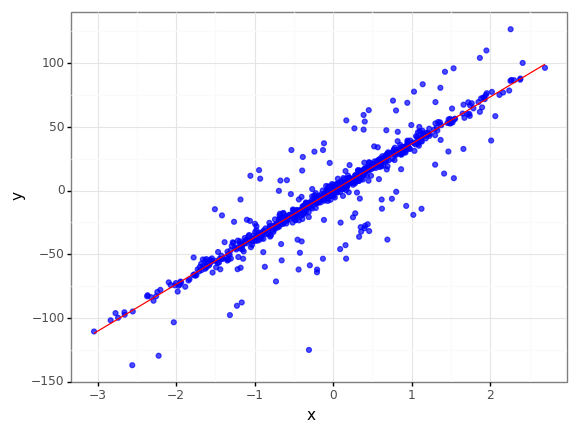

<ggplot: (-9223371881178787752)>

In [100]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = reg_data.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    theme_bw()
)

In [101]:
train_noise_add, val_noise_add = train_test_split(reg_data)

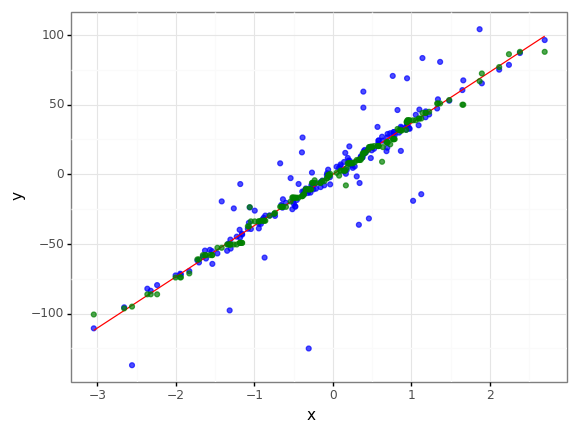

<ggplot: (-9223371881179046831)>

In [102]:
gb_mae = GradientBoostingRegressor(loss='lad')
gb_mae.fit(train_noise_add[["x"]], train_noise_add["y"])
val_noise_add["predict_mae"] = gb_mae.predict(val_noise_add[["x"]])

(
    ggplot() +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise_add.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "predict_mae"), alpha = 0.7, color = "green") +
    theme_bw()
)

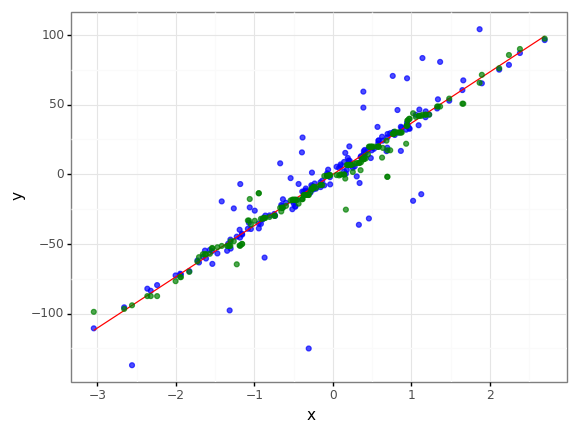

<ggplot: (-9223371881187576814)>

In [103]:
gb_mse = GradientBoostingRegressor(loss='ls')
gb_mse.fit(train_noise_add[["x"]], train_noise_add["y"])
val_noise_add["predict_mse"] = gb_mse.predict(val_noise_add[["x"]])

(
    ggplot() +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "y"), alpha = 0.7, color = "blue") +
    geom_line(data = val_noise_add.assign(Yhat = lambda x : W * x["x"]), mapping = aes(x = "x", y = "Yhat"), color = "red") +
    geom_point(data = val_noise_add, mapping = aes(x = "x", y = "predict_mse"), alpha = 0.7, color = "green") +
    theme_bw()
)

In [104]:
r2_mse = r2_score(val_noise_add["y"], val_noise_add["predict_mse"])
r2_mae = r2_score(val_noise_add["y"], val_noise_add["predict_mae"])
print(f"loss function = mse , r2 = {r2_mse} \nloss function = mae , r2 = {r2_mae} \n")
print("mse loss function is better") if r2_mse > r2_mae else print("mae loss function is better")

loss function = mse , r2 = 0.8225514970989318 
loss function = mae , r2 = 0.839168551397096 

mae loss function is better


- 랜덤하게 노이즈를 추가한 결과 역시 mae를 사용한 모델이 성능이 더 좋게 나왔습니다.
- 하지만 그래프를 보면 mae를 사용한 결과 거의 선에 fitting되어 오버피팅처럼 보이는 경향이 있습니다.
- mse를 사용한 모델의 경우 이상치가 추가된 데이터를 조금은 따라가려는 듯한 모습을 보입니다.

---

#### **중간 결론**
- 시계열 데이터 - ARIMA를 설명할 때의 결론도 그랬지만, 성능 지표를 무조건 맞추기 보다는 직면한 문제 맞도록 모델, cost function을 정의하는 것이 중요하다고 생각된다.
- 중간에 멘토링을 할 때도 잠깐 느꼈지만, 모델(혹은 기술)에 대한 무조건적인 지향과 흔히 대회들에서 요구하는 평가지표로 높은 순서를 가져가는 것보다는 생각했던 기획, 목표에 맞는 모델링을 할 수 있는 인사이트와 이해력이 앞으로 필요할 것 같습니다.

---

#### 3. Huber

![Oops](https://miro.medium.com/max/1050/1*0eoiZGyddDqltzzjoyfRzA.png)
<br>

- 임의의 값 델타(δ)를 정하여 -δ < e < δ 이면 mse를 사용하고 아니면 mae를 사용합니다.
    - 이렇게 특정값 이상되면 mae를 사용하고, 작은 값에 대해서는 학습이 잘되는 mse를 hybrid로 활용하게 됩니다.
    - 1/2를 곱해주는 것은 두 함수의 그래프가 매끄럽게 이어지도록 만들어주는 역할을 합니다.

---



##### 1.1 RMSE - Root Mean Squared Error(평균 절대 오차)

![Oops](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8rc53%2FbtqIOoQ7txw%2FNYjEa95VQGXdJKAkK15tn0%2Fimg.png)

- 실제값과 예측값 오차(Error)의 제곱값의 평균의 제곱근 값입니다. 
    - MSE가 실제 값에 제곱이 되어있기 때문에 평가지표로서 비교하기 어려움으로 제곱근을 하면 비교가 용이해집니다.(표준편차와 분산 이라고 생각하시면 될 것 같습니다.)
    - Gradient Descent를 할 때 미분값이 활용되므로 가장 일반적인 비용함수로 활용된다고 합니다.
    - 사용되지만 Error에 제곱을 하기 때문에 이상치에 민감하게 되는 특성을 가지고 있습니다.

In [44]:
Ws = []
reg_data = pd.DataFrame()
for i in range(7) :
    reg_data_ = make_regression(n_samples=100, n_features=1, coef = True, bias= i*random.randint(10, 50), noise=30, random_state = i * 5)
    W_ = reg_data_[2]
    reg_data_ = pd.DataFrame({"x" : np.reshape(reg_data_[0], (1, -1))[0], "y" : np.reshape(reg_data_[1], (1, -1))[0]})
    reg_data_["W"] = W_
    Ws += W_
    reg_data = pd.concat([reg_data, reg_data_])

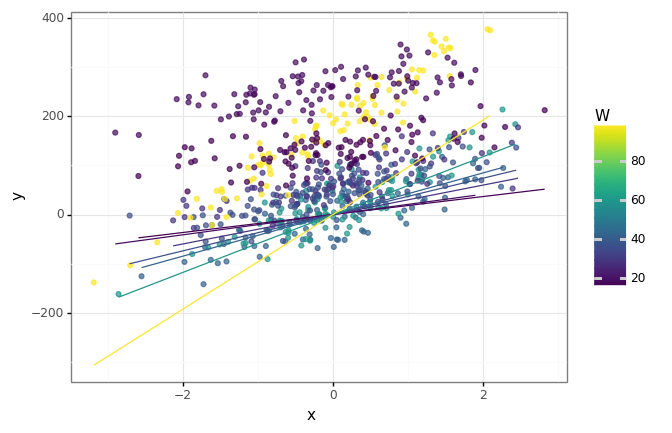

<ggplot: (-9223371933397061067)>

In [45]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y", color = "W"), alpha = 0.7, ) +
    geom_line(data = reg_data.assign(Yhat = lambda x : x["W"] * x["x"]), mapping = aes(x = "x", y = "Yhat", group = "W", color = "W")) +
    theme_bw()
)

In [50]:
train_quant, val_quant = train_test_split(reg_data)

In [79]:
result = {}
result_ = {}
result__ = {}
for alpha in [(i+1) / 10 for i in range(9)] :
    gb_quant = GradientBoostingRegressor(loss='quantile', alpha = alpha)
    gb_quant.fit(train_quant[["x"]], train_quant["y"])
    result[f"q{alpha}"] = gb_quant.predict(val_quant[["x"]])
    result_[f"q{alpha}"] = val_quant["y"]
    result__[f"q{alpha}"] = val_quant["x"]
result = pd.DataFrame(result)
result_ = pd.DataFrame(result_)
result__ = pd.DataFrame(result__)

In [80]:
result = pd.concat([pd.melt(result).add_prefix("predict_"), pd.melt(result_).add_prefix("Y_"), pd.melt(result__).add_prefix("X_")], axis = 1)

In [95]:
result

,predict_variable,predict_value,Y_variable,Y_value,X_variable,X_value
0,q0.1,-9.329473,q0.1,-51.545008,q0.1,-0.302303
1,q0.1,-5.211425,q0.1,-34.888322,q0.1,0.410599
2,q0.1,-11.674754,q0.1,249.261944,q0.1,-0.450008
3,q0.1,-12.202611,q0.1,73.598266,q0.1,0.099149
4,q0.1,-5.211425,q0.1,208.494961,q0.1,0.438024
...,...,...,...,...,...,...
1570,q0.9,119.527735,q0.9,29.867325,q0.9,-1.994394
1571,q0.9,232.788302,q0.9,51.443147,q0.9,-0.272506
1572,q0.9,238.953822,q0.9,228.604331,q0.9,-1.927305
1573,q0.9,229.898932,q0.9,36.818548,q0.9,-0.697810


In [97]:
result["q"] = result["predict_variable"].str.replace("q", "").astype(float)

In [98]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   predict_variable  1575 non-null   object 
 1   predict_value     1575 non-null   float64
 2   Y_variable        1575 non-null   object 
 3   Y_value           1575 non-null   float64
 4   X_variable        1575 non-null   object 
 5   X_value           1575 non-null   float64
 6   q                 1575 non-null   float64
dtypes: float64(4), object(3)
memory usage: 86.3+ KB


In [112]:
reg_data

,x,y,W
0,-0.359553,-29.387972,42.385505
1,0.976639,-18.771359,42.385505
2,0.402342,0.563777,42.385505
3,-0.813146,19.905024,42.385505
4,-0.887786,-31.843421,42.385505
...,...,...,...
95,-1.927305,228.604331,20.648364
96,0.205633,240.317056,20.648364
97,0.030028,294.257481,20.648364
98,1.383847,248.271959,20.648364


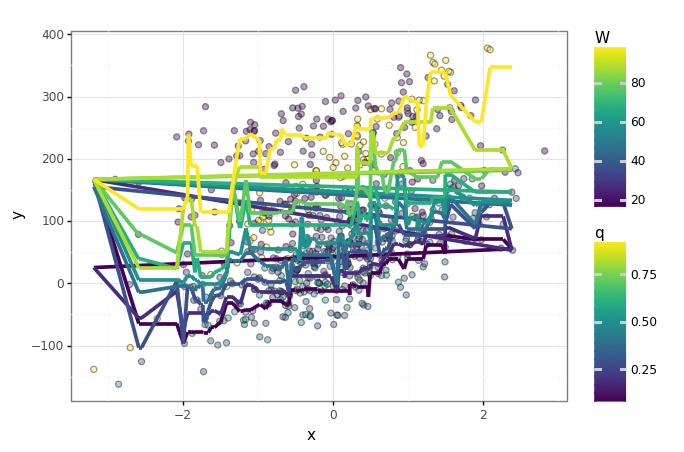

<ggplot: (103460981915)>

In [115]:
(
    ggplot() +
    geom_point(data = reg_data, mapping = aes(x = "x", y = "y", fill = "W"), alpha = 0.4, size = 2) +
    geom_line(data = result, mapping = aes(x = "X_value", y = "predict_value", color = "q"), group = "predict_variable", size = 1.5) +
    theme_bw()
)

---


> 출처 : [https://brunch.co.kr/@tristanmhhd/14](https://brunch.co.kr/@tristanmhhd/14)<br>
> 출처 : [https://steadiness-193.tistory.com/277]](https://steadiness-193.tistory.com/277)

---

code : https://github.com/Chanjun-kim/Chanjun-kim.github.io/blob/main/_ipynb/2021-07-05-LossFunction.ipynb

---

참고 자료 : 
- https://ganghee-lee.tistory.com/28